#1	Making first Submission
#2	Data Cleaning & Prep - Convert String to Date format code
#3	Data Cleaning & Prep - Identify and Treat Missing Dates with mean of previous years
#4	Data Cleaning & Prep - Identify and Treat Outliers (tsclean)
#5	EDA - STL plot (periodic)
#6	EDA - decompose plot (additive)
#7	ACF and PACF Plots
#8	Perform ADF Test
#9	ARIMA Only
#10	ARIMAX Model - with auto.arima (Holiday)
#11	Try other models
#12	Calculate Performance Metrics
#1 point for (ME, RMSE, MAE, MPE, MAPE)
#  13	Forecast using Model
#14	Create Submission Dataset
#16	Make a plot with Actual and Predicted Values
#17	Submit a Leaderboard Score
#18	Top Score Points between (< 4)
#19	With Deadline Submission

In [1]:
#holidays data
holidays <- read.csv("/kaggle/input/ipba-17-time-series-forecasting-png//holidays.csv")
#test data
test <- read.csv("/kaggle/input/ipba-17-time-series-forecasting-png//test.csv")
# training data
mydata <- read.csv("/kaggle/input/ipba-17-time-series-forecasting-png//train.csv")

dim(mydata)

str(mydata)
mydata$date[1]
class(mydata$date[1])

[1] 1455    2

'data.frame':	1455 obs. of  2 variables:
 $ date        : chr  "01-01-2013" "02-01-2013" "03-01-2013" "04-01-2013" ...
 $ transactions: int  770 93215 78504 78494 93573 90464 75597 72325 71971 66383 ...


[1] "01-01-2013"

[1] "character"

#2	Data Cleaning & Prep - Convert String to Date format code

In [2]:
mydata$date <- as.Date(mydata$date, "%d-%m-%Y")
#mydata$date <- as.Date(mydata$date, "%Y-%d-%m","%d-%m-%Y")
class(mydata$date[1])
mydata$date[1] + 10

head(mydata)
tail(mydata)

[1] "Date"

[1] "2013-01-11"

,date,transactions
,<date>,<int>
1,2013-01-01,770
2,2013-01-02,93215
3,2013-01-03,78504
4,2013-01-04,78494
5,2013-01-05,93573
6,2013-01-06,90464


,date,transactions
,<date>,<int>
1450,2016-12-26,105524
1451,2016-12-27,95643
1452,2016-12-28,103717
1453,2016-12-29,102665
1454,2016-12-30,127771
1455,2016-12-31,135568


#3	Data Cleaning & Prep - Identify and Treat Missing Dates with mean of previous years

In [3]:
any(is.na(mydata)) # checks if any NA is present or not
any(is.na(test))
any(is.na(holidays))

[1] FALSE

[1] FALSE

[1] FALSE

#4	Data Cleaning & Prep - Identify and Treat Outliers (tsclean)

In [4]:

summary(mydata)
summary(test)
summary(holidays)

# Rename the columns to more meaningful names 
colnames(mydata) <- c("Date", "Sales")
View(mydata)

# Import necessary libs 
library(tseries)
library(forecast)

# How many records we have in time series 
nrow(mydata)


# Split dataset into training and testing 
# Approach-1 :- Year 2013 to 2017 - training (2013 to 2016) and testin ( 2016 to 2017)
# Approach-2 :- First 80-90% for training and remaining for testing
# Approach-3 :- First n records for traning and remaning for testing 
# We will use first 1455 records for model training and remaining for model testing 

sales <- mydata$Sales[1:1455]
sales  # Actual sales

# Optional but highly recommended 
# Instead of building model on actual data, do a log and build model on log data
# log reduced the spread of data 
install.packages("MASS")
library(MASS)
library(forecast)


lnsales <- log(sales)
lnsales# log values of sales
#boxcox transformation


      date             transactions   
 Min.   :2013-01-01   Min.   :   770  
 1st Qu.:2013-12-31   1st Qu.: 75596  
 Median :2014-12-31   Median : 80387  
 Mean   :2014-12-31   Mean   : 83491  
 3rd Qu.:2015-12-30   3rd Qu.: 90166  
 Max.   :2016-12-31   Max.   :171169  

     date                 id       
 Length:227         Min.   :  0.0  
 Class :character   1st Qu.: 56.5  
 Mode  :character   Median :113.0  
                    Mean   :113.0  
                    3rd Qu.:169.5  
                    Max.   :226.0  

     Date              Holidays    
 Length:312         Min.   :1.000  
 Class :character   1st Qu.:1.000  
 Mode  :character   Median :1.000  
                    Mean   :1.122  
                    3rd Qu.:1.000  
                    Max.   :4.000  

Date,Sales
<date>,<int>
2013-01-01,770
2013-01-02,93215
2013-01-03,78504
2013-01-04,78494
2013-01-05,93573
2013-01-06,90464
2013-01-07,75597
2013-01-08,72325
2013-01-09,71971


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] 1455

[1]    770  93215  78504  78494  93573  90464  75597  72325  71971  66383
  [11]  70338  85511  86306  70078  71134  72471  68873  71371  88558  85281
  [21]  73250  68988  69819  63705  71273  88022  83304  70389  68435  70888
  [31]  70268  78302  97347  87026  75330  76206  75291  72789  79726  90342
  [41]  69963  67222  71808  80098  88681  75789  92816  77449  76437  70645
  [51]  73812  68246  70914  88390  84125  72167  68706  70170  69818  79524
  [61]  98616  92716  79078  75134  76519  73910  78231  92462  86322  75161
  [71]  69346  72010  67393  75533  91900  89346  74418  71841  74145  69157
  [81]  71990  91923  83439  72992  68469  74049  82104  77781  90611  82563
  [91]  81678  77165  78534  72217  74928  94844  89183  75161  71416  73989
 [101]  71907  75403  92166  86803  76251  74187  74529  68343  73119  92014
 [111]  87401  75157  71657  73003  68917  72813  89825  86773  72009  73513
 [121]  90548  73639  76685  96689  95212  76383  72563  74802  75025  80282
 [131] 111484  89790  75625  71589  74401  71287  74705  91973  89031  74613
 [141]  70601  71763  70843  78945  85230  81869  72144  71801  73970  77052
 [151]  76921 101740  98018  80648  76213  77605  72282  79014  89783  89751
 [161]  74546  68636  73386  69703  76434 102541  87839  76236  73179  68613
 [171]  69984  73717  88681  86152  73403  70549  71009  67340  74172  93531
 [181]  87501  81850  79187  78437  75664  77710  92132  87219  77464  73041
 [191]  73319  68662  73261  88063  81622  76717  75755  73859  69399  73231
 [201]  87653  80799  75771  73650  72876  70760  74270  86632  79729  72911
 [211]  72512  77813  78740  79127  93926  86805  82080  77927  77426  72592
 [221]  77361  85444  80268  76317  74660  74211  74220  79668  88888  83247
 [231]  77100  76629  76613  71220  75844  87502  82558  76173  73568  74979
 [241]  71897  77749  96400  95871  84388  79834  80360  74704  74579  95846
 [251]  94015  77169  72483  74287  68478  73019  92336  90410  77189  72907
 [261]  72512  67209  74285  91544  87513  75213  70348  71613  66914  72409
 [271]  91304  87268  74455  80690  80520  73793  78169  97345  91143  77290
 [281]  73728  73206  71249  80838  85003  83357  72589  71021  73902  70806
 [291]  71837  93205  91210  74337  69581  71321  67609  72010  89451  86852
 [301]  73374  69205  72246  71553  79385  93949  91085  79630  76352  76148
 [311]  70599  74646  91367  91689  75194  72225  71600  67268  74804  94069
 [321]  90357  76133  71496  74998  69198  73466  91187  87771  73966  70690
 [331]  71571  69896  74816  94311  96910  82768  79820  80529  77466  80763
 [341]  95160  92142  80274  79326  82055  80045  84558 101340 102239  92585
 [351]  94103 102356 109267 106238 121425 118997 145876 155846  96002  98330
 [361] 102858  88729 117645 117214   1327  90716  84488 101361  93475  77784
 [371]  75361  77204  72575  75302  94661  89216  75590  71724  74904  73914
 [381]  75507  92853  88313  74870  74384  72600  69863  74881  89619  86186
 [391]  73833  71475  70343  69738  79461 100397  91157  82999  78774  79153
 [401]  75574  78958  92697  83507  78191  75239  79051  82922  92671  93175
 [411]  88232  76721  73438  73514  71024  75172  93092  80419  77401  72686
 [421]  74042  73390  84571 102182  79124  76019  81818  84962  81147  80361
 [431]  94346  92694  77536  75793  75820  72982  77386  91559  93240  80383
 [441]  75912  76911  74462  78342  93889  89071  74406  74454  74887  71079
 [451]  78180  95635  88582  82265  84822  83375  78063  81700 101536  94488
 [461]  80982  76904  78352  76260  80053  95879  88770  77753  76278  81231
 [471]  84493  81003  92589  86198  79111  75889  75358  71753  75347  89576
 [481]  88583  73482  71015  74823  87240  80437  98252  93157  77689  75193
 [491]  77067  73342  81067 108342  90945  76000  73847  73257  70281  75778
 [501]  91408  93334  75548  73023  73409  68645  71882  90183  88321  73627
 [511]  70265  71949  74837  77930  97007 101478  83193  79665  78673  73882

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1]  6.646391 11.442664 11.270905 11.270777 11.446497 11.412707 11.233172
   [8] 11.188925 11.184019 11.103196 11.161067 11.356400 11.365654 11.157364
  [15] 11.172321 11.190942 11.140020 11.175647 11.391413 11.353707 11.201634
  [22] 11.141688 11.153661 11.062018 11.174273 11.385342 11.330252 11.161792
  [29] 11.133640 11.168856 11.160072 11.268328 11.486037 11.373962 11.229634
  [36] 11.241195 11.229116 11.195320 11.286351 11.411358 11.155722 11.115756
  [43] 11.181751 11.291006 11.392801 11.235708 11.438374 11.257375 11.244222
  [50] 11.165423 11.209277 11.130874 11.169223 11.389514 11.340059 11.186738
  [57] 11.137592 11.158676 11.153647 11.283814 11.498989 11.437296 11.278190
  [64] 11.227028 11.245294 11.210603 11.267421 11.434553 11.365840 11.227388
  [71] 11.146864 11.184560 11.118296 11.232325 11.428456 11.400272 11.217453
  [78] 11.182211 11.213778 11.144135 11.184282 11.428707 11.331871 11.198105
  [85] 11.134136 11.212482 11.315742 11.261652 11.414331 11.321317 11.310540
  [92] 11.253701 11.271287 11.187431 11.224283 11.459989 11.398446 11.227388
  [99] 11.176277 11.211672 11.183129 11.230602 11.431347 11.371396 11.241786
 [106] 11.214344 11.218944 11.132294 11.199844 11.429696 11.378262 11.227335
 [113] 11.179646 11.198256 11.140658 11.195650 11.405619 11.371051 11.184546
 [120] 11.205218 11.413635 11.206930 11.247461 11.479255 11.463861 11.243515
 [127] 11.192210 11.222600 11.225577 11.293301 11.621636 11.405229 11.233542
 [134] 11.178697 11.217225 11.174469 11.221302 11.429250 11.396740 11.220070
 [141] 11.164800 11.181124 11.168221 11.276507 11.353109 11.312876 11.186419
 [148] 11.181654 11.211415 11.252236 11.250534 11.530176 11.492906 11.297849
 [155] 11.241287 11.259387 11.188330 11.277380 11.405151 11.404794 11.219172
 [162] 11.136572 11.203488 11.151999 11.244183 11.538018 11.383261 11.241589
 [169] 11.200664 11.136237 11.156022 11.207989 11.392801 11.363868 11.203720
 [176] 11.164063 11.170562 11.117510 11.214142 11.446048 11.379406 11.312644
 [183] 11.279567 11.270051 11.234058 11.260739 11.430978 11.376177 11.257569
 [190] 11.198776 11.202575 11.136951 11.201784 11.385808 11.309854 11.247879
 [197] 11.235260 11.209913 11.147628 11.201374 11.381141 11.299720 11.235471
 [204] 11.207079 11.196515 11.167049 11.215462 11.369425 11.286389 11.196995
 [211] 11.191507 11.262064 11.273907 11.278809 11.450263 11.371420 11.315450
 [218] 11.263528 11.257078 11.192610 11.256238 11.355616 11.293126 11.242651
 [225] 11.220700 11.214668 11.214789 11.285623 11.395132 11.329567 11.252859
 [232] 11.246731 11.246522 11.173529 11.236434 11.379417 11.321256 11.240762
 [239] 11.205965 11.224963 11.182990 11.261241 11.476261 11.470759 11.343180
 [246] 11.287705 11.294272 11.221289 11.219614 11.470498 11.451210 11.253753
 [253] 11.191107 11.215691 11.134268 11.198475 11.433189 11.412110 11.254012
 [260] 11.196940 11.191507 11.115562 11.215664 11.424575 11.379543 11.228079
 [267] 11.161210 11.179032 11.111163 11.190086 11.421950 11.376739 11.217950
 [274] 11.298370 11.296261 11.209019 11.266628 11.486017 11.420185 11.255320
 [281] 11.208138 11.201033 11.173936 11.300202 11.350442 11.330888 11.192569
 [288] 11.170731 11.210495 11.167699 11.182155 11.442557 11.420920 11.216364
 [295] 11.150247 11.174946 11.121496 11.184560 11.401446 11.371961 11.203325
 [302] 11.144828 11.187832 11.178194 11.282065 11.450507 11.419548 11.285146
 [309] 11.243110 11.240434 11.164771 11.220512 11.422640 11.426158 11.227827
 [316] 11.187542 11.178850 11.116440 11.222627 11.451784 11.411524 11.240237
 [323] 11.177397 11.225217 11.144727 11.204578 11.420668 11.382486 11.211361
 [330] 11.166059 11.178445 11.154764 11.222787 11.454353 11.481538 11.323797
 [337] 11.287529 11.296373 11.257594 11.299274 11.463315 11.431086 11.293201
 [344] 11.281321 11.315145 11.290344 11.345193 11.526236 11.535068 11.435882
 [351] 11.452145 11.536212 11.601550 11.573437 11.707052 11.686854 11.890512
 [358] 11.956624 11.472124 11.496084 11.541105 11.393342 11.675427 11.671757

#5	EDA - STL plot (periodic)

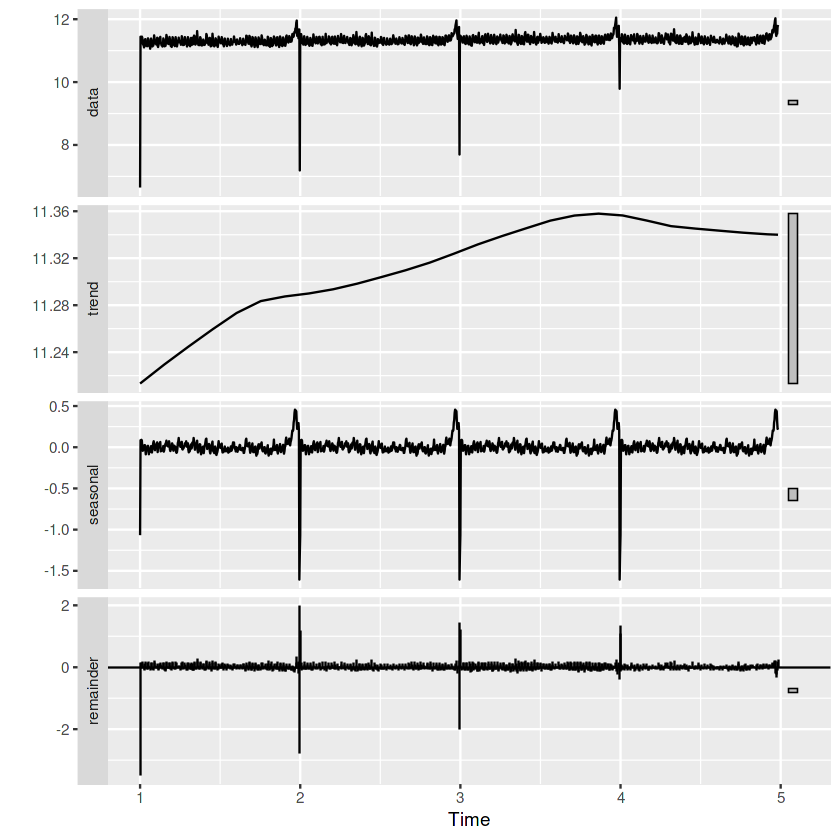

In [5]:
# Load necessary libraries

library(ggplot2)

# Create a time series object
ts_data <- ts(lnsales, frequency = 365)

# Decompose the time series using STL
stl_result <- stl(ts_data, s.window = "periodic")

# Plot the STL components
autoplot(stl_result)

#6	EDA - decompose plot (additive)

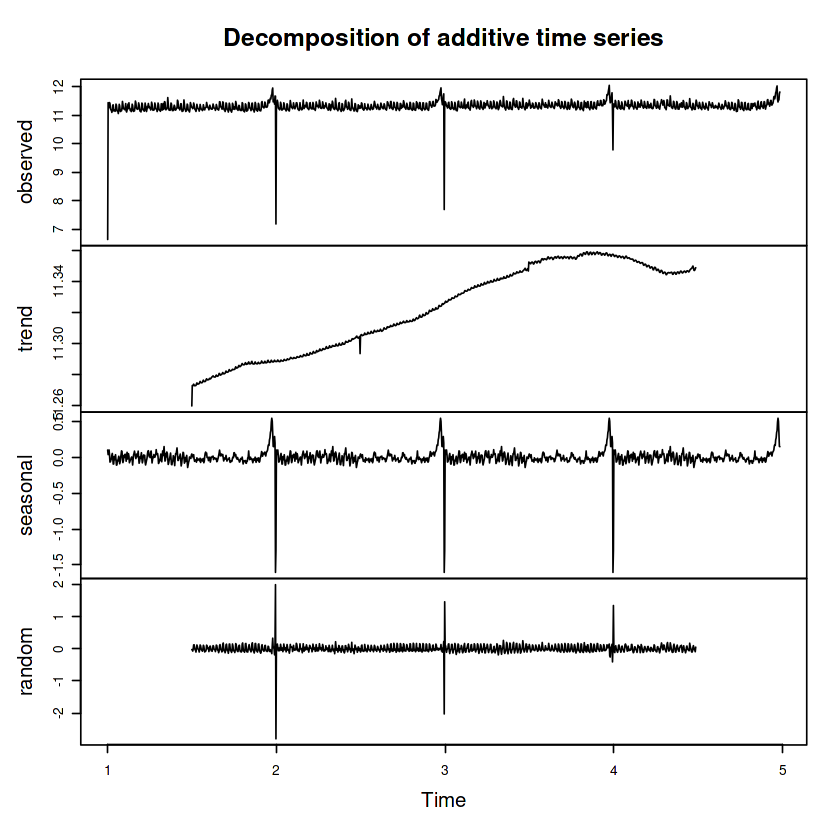

In [6]:
# Decompose the time series using an additive model
decomposed <- decompose(ts_data, type = "additive")

# Plot the decomposed components
plot(decomposed)

#7	ACF and PACF Plots

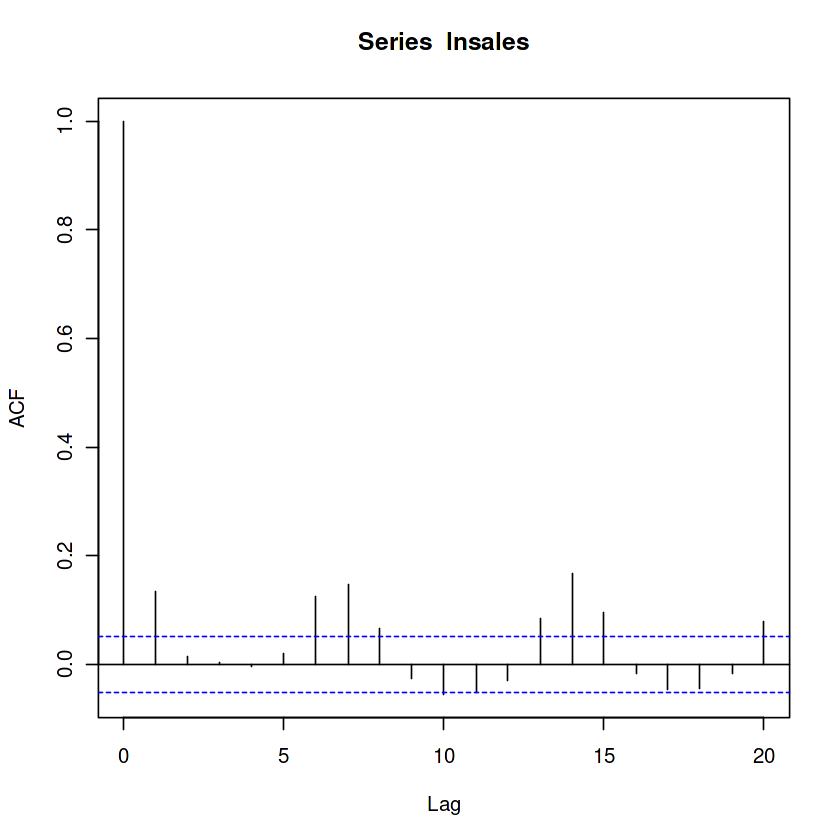

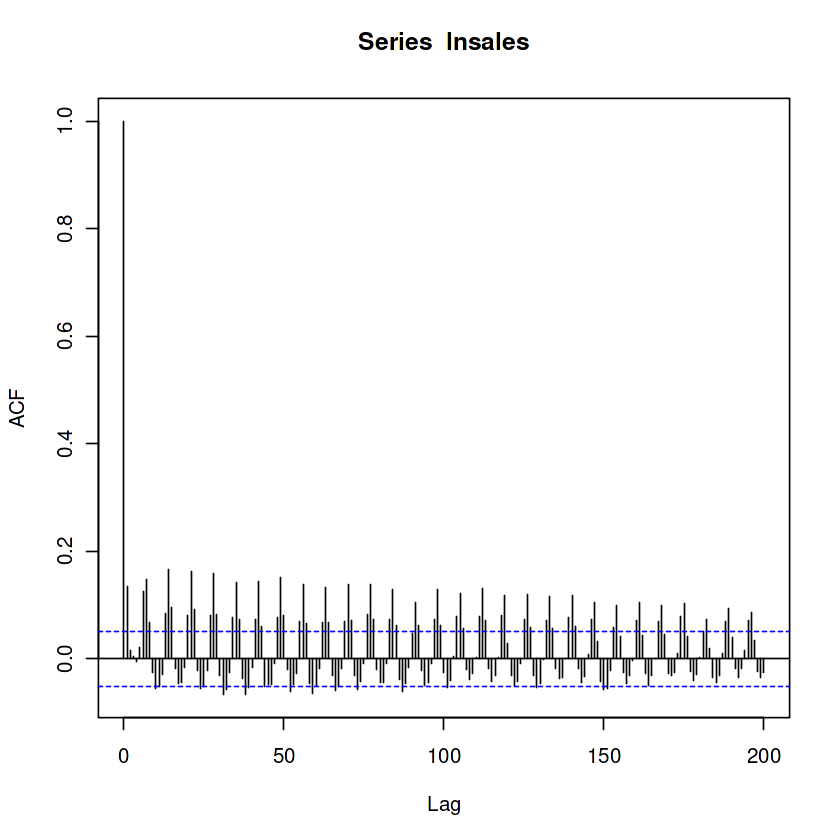

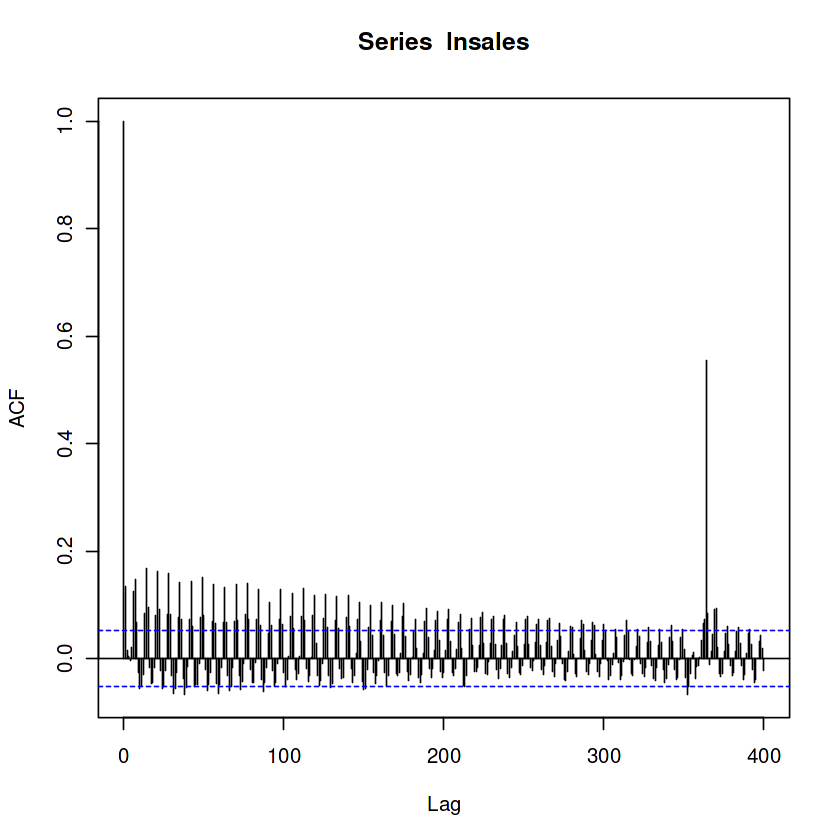

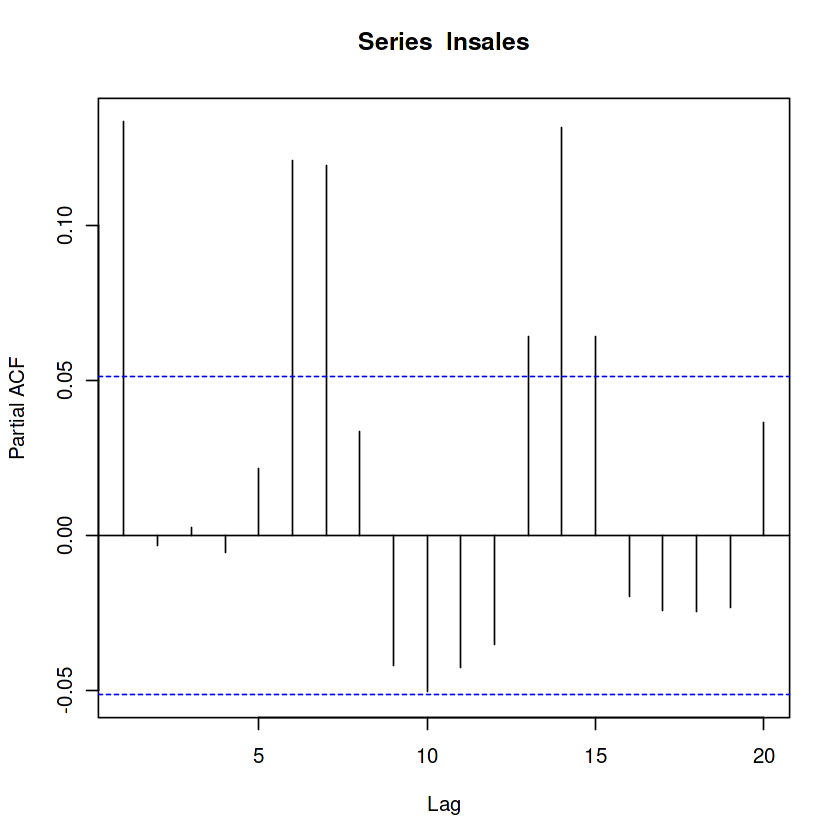

In [7]:
# Time to build ARIMA model 
# AR - PACF plot 
# I  - ADF Test
# MA - ACF plot 

# MA term ? - ACF plot 
acf(lnsales, lag.max = 20) # Mostly all the correlated time period will be in last 20 time frame. 
acf(lnsales, lag.max = 200)
acf(lnsales, lag.max = 400)
# We can't conclude anything by looking at MA plot 

# AR term - PACF plot
pacf(lnsales, lag.max = 20)  # AR term is 3.

#8	Perform ADF Test

Warning message in adf.test(lnsales):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  lnsales
Dickey-Fuller = -11.775, Lag order = 11, p-value = 0.01
alternative hypothesis: stationary


[1] "numeric"

[1] "ts"

$x
Time Series:
Start = c(2013, 1) 
End = c(2016, 360) 
Frequency = 365 
   [1]  6.646391 11.442664 11.270905 11.270777 11.446497 11.412707 11.233172
   [8] 11.188925 11.184019 11.103196 11.161067 11.356400 11.365654 11.157364
  [15] 11.172321 11.190942 11.140020 11.175647 11.391413 11.353707 11.201634
  [22] 11.141688 11.153661 11.062018 11.174273 11.385342 11.330252 11.161792
  [29] 11.133640 11.168856 11.160072 11.268328 11.486037 11.373962 11.229634
  [36] 11.241195 11.229116 11.195320 11.286351 11.411358 11.155722 11.115756
  [43] 11.181751 11.291006 11.392801 11.235708 11.438374 11.257375 11.244222
  [50] 11.165423 11.209277 11.130874 11.169223 11.389514 11.340059 11.186738
  [57] 11.137592 11.158676 11.153647 11.283814 11.498989 11.437296 11.278190
  [64] 11.227028 11.245294 11.210603 11.267421 11.434553 11.365840 11.227388
  [71] 11.146864 11.184560 11.118296 11.232325 11.428456 11.400272 11.217453
  [78] 11.182211 11.213778 11.144135 11.184282 11.428707 11.331871 11.198105
  [

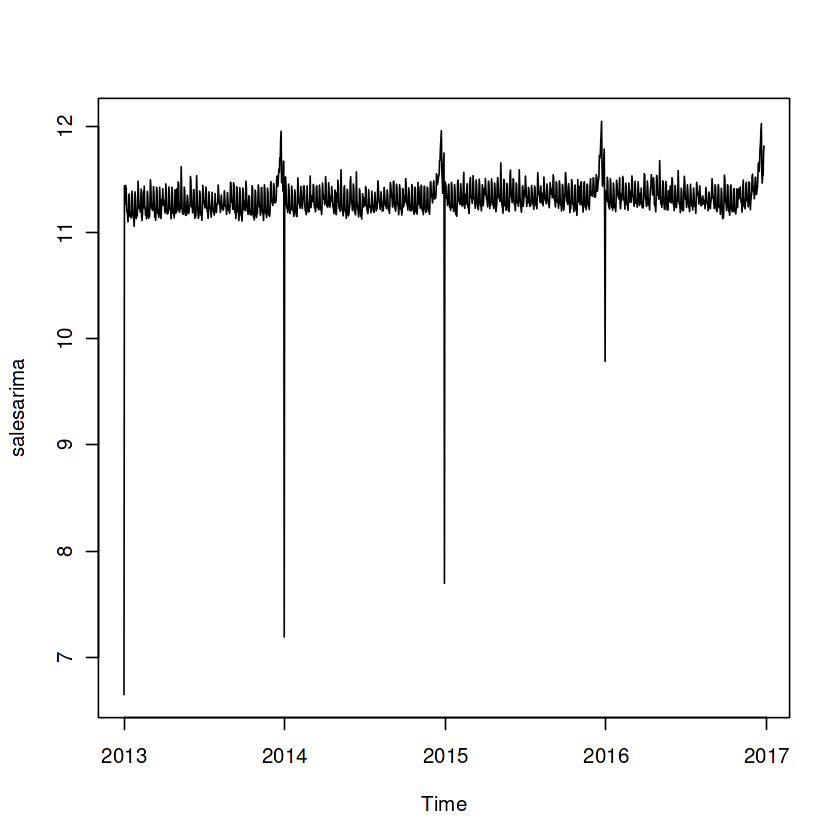

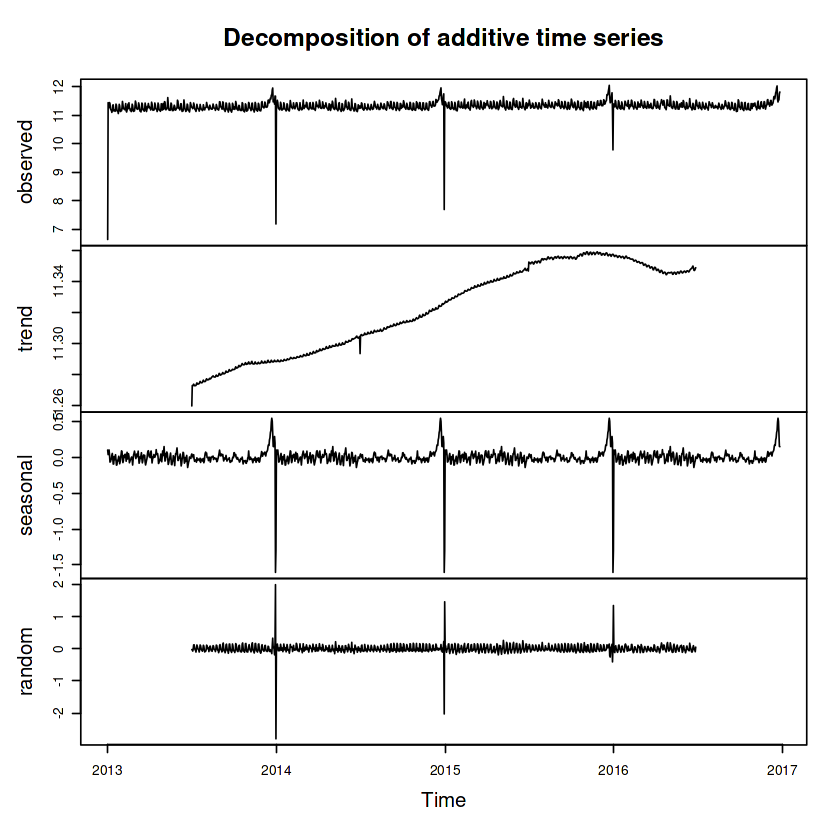

In [8]:

# Check for I term - to check if time series is stationary or not 
adf.test(lnsales)
# p-value is less than 0.05 => TS is stationary and dickey-fuller value is near to -12.5

# TS is stationary  1. I = 0

# ARIMA = ( 3, 0, ?)

# AUTO ARIMA 

# Pre-requisite to run Auto Arima 
# You should have a time series datatype 
class(lnsales) # Numeric vector 

salesarima <- ts(lnsales, start = c(2013,1), frequency = 365)
class(salesarima)
plot(salesarima)
decompose(salesarima)
plot(decompose(salesarima))

#9	ARIMA Only

In [9]:
# fit auto arima 
fitlnsales <- auto.arima(salesarima)
fitlnsales

Series: salesarima 
ARIMA(3,1,1) 

Coefficients:
         ar1      ar2      ar3      ma1
      0.1469  -0.0505  -0.0355  -0.9771
s.e.  0.0331   0.0326   0.0328   0.0127

sigma^2 = 0.05129:  log likelihood = 96.76
AIC=-183.51   AICc=-183.47   BIC=-157.1

#10	ARIMAX Model - with auto.arima (Holiday)

In [10]:
#holidays$Date <- as.Date(holidays$Date, "%d-%m-%Y")

# Create a time series object for the holiday data (assuming it's binary, 1 for holiday, 0 otherwise)
#ts_holidays <- ts(ifelse(mydata$date %in% holidays$Date, 1, 0), frequency = 365)

# Perform the ARIMAX modeling with auto.arima
#arima_model <- auto.arima(ts_data, xreg = ts_holidays)

# Summary of the ARIMAX model
#summary(arima_model)

#11	Try other models

In [11]:
#holt-winters exponential smoothing
#ets_model <- ets(ts_data)
#forecast_ets <- forecast(ets_model,227)

#prophet_model
#library(prophet)
# Assuming 'mydata' has 'ds' (date) and 'y' (Sales) columns
#prophet_data <- data.frame(ds = mydata$date, y = mydata$Sales)
#prophet_model <- prophet(prophet_data)
#forecast_prophet <- predict(prophet_model)

#stl model already did above

In [12]:
#12	Calculate Performance Metrics 1 point for (ME, RMSE, MAE, MPE, MAPE)

In [13]:

# Assuming 'actual_values' and 'forecasted_values' are vectors of actual and forecasted sales

# Mean Error (ME)
#ME <- mean(actual_values - forecasted_values)

# Root Mean Squared Error (RMSE)
#RMSE <- sqrt(mean((actual_values - forecasted_values)^2))

# Mean Absolute Error (MAE)
#MAE <- mean(abs(actual_values - forecasted_values))

# Mean Percentage Error (MPE)
#MPE <- mean((actual_values - forecasted_values) / actual_values) * 100

# Mean Absolute Percentage Error (MAPE)
#MAPE <- mean(abs((actual_values - forecasted_values) / actual_values)) * 100

# Print or display the calculated metrics
#print(paste("Mean Error (ME):", ME))
#print(paste("Root Mean Squared Error (RMSE):", RMSE))
#print(paste("Mean Absolute Error (MAE):", MAE))
#print(paste("Mean Percentage Error (MPE):", MPE, "%"))
#print(paste("Mean Absolute Percentage Error (MAPE):", MAPE, "%"))

#13	Forecast using Model

[1] "forecast"

  [1] 87667.82 87709.11 87742.15 87768.60 87789.76 87806.69 87820.24 87831.08
  [9] 87839.75 87846.69 87852.24 87856.68 87860.23 87863.08 87865.35 87867.17
 [17] 87868.63 87869.79 87870.72 87871.47 87872.06 87872.54 87872.92 87873.23
 [25] 87873.47 87873.67 87873.82 87873.95 87874.05 87874.13 87874.19 87874.24
 [33] 87874.29 87874.32 87874.34 87874.37 87874.38 87874.40 87874.41 87874.41
 [41] 87874.42 87874.43 87874.43 87874.44 87874.44 87874.44 87874.44 87874.44
 [49] 87874.44 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45
 [57] 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45
 [65] 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45
 [73] 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45
 [81] 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45
 [89] 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45
 [97] 87874.45 87874.45 87874.45 87874.45 87874.45 87874.45 8787

test.id.1.227.,finalforecastvalue.1.227.
<int>,<dbl>
0,87667.82
1,87709.11
2,87742.15
3,87768.60
4,87789.76
5,87806.69
6,87820.24
7,87831.08
8,87839.75


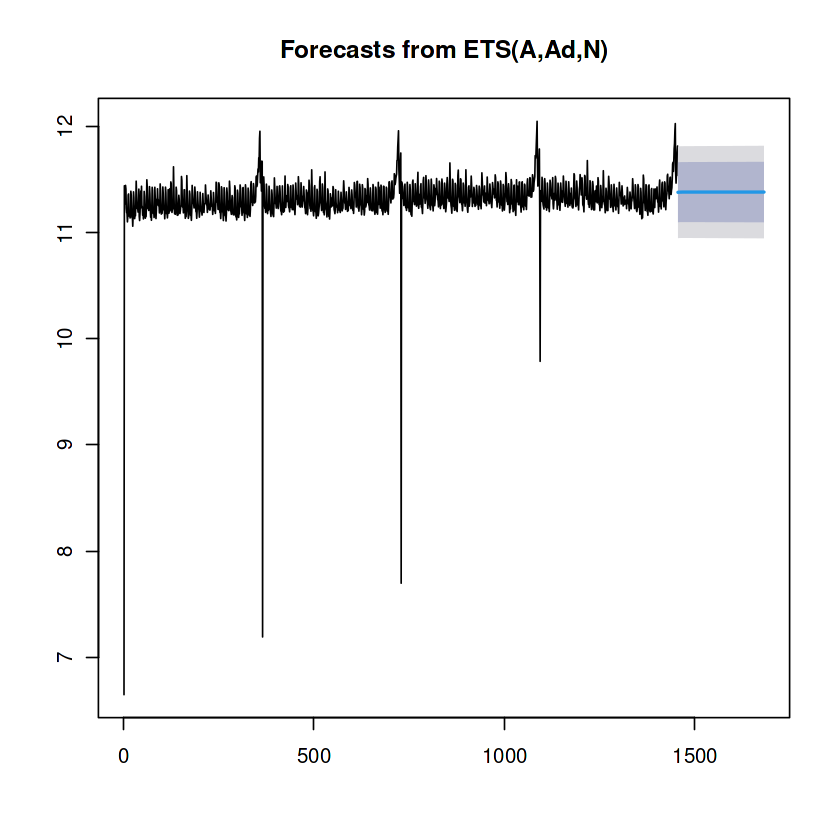

In [14]:
# Forecast values for next 227 time period 
forecastvalues_ln <- forecast(lnsales, 227)
plot(forecastvalues_ln)
class(forecastvalues_ln)
forecastvaluesextreacted <- as.numeric(forecastvalues_ln$mean)  # log values value not the real value 
finalforecastvalue <- exp(forecastvaluesextreacted)
#original_sales <- InvBoxCox(transformed_sales, lambda)

print(finalforecastvalue)

# Let's create a dataframe with id of test set and forecasted sales 
df <- data.frame(test$id[1:227], finalforecastvalue[1:227])
View(df)
colnames(df) <- c("id", "transactions")

#14	Create Submission Dataset

In [15]:
# Assuming you have predicted prices stored in the variable predicted_prices
# Save the predicted prices to a CSV file
write.csv(df, file = "/kaggle/working/submission.csv",row.names=FALSE)

#16	Make a plot with Actual and Predicted Values

In [16]:
#df$precentage_error <- ((df$`Actual values` - df$`forecasted values`)/df$`Actual values`)
#View(df)
#mean(df$precentage_error)*100